In [1]:
from pynq import Overlay
import numpy as np
import random 
from pynq import allocate
from scipy import signal
import matplotlib.pyplot as plt

stream_overlay = Overlay ('/home/xilinx/pynq/overlays/Morse/Morse.bit')
#stream_overlay?

In [2]:
input_signal = np.load('audio.txt')

In [3]:
num_of_samples = len(input_signal)
dma = stream_overlay.axi_dma_0
filtered_data = allocate(shape=(num_of_samples,), dtype = np.float32)

In [ ]:
stream_overlay.hierarchy_dict

In [4]:
def run_kernal(in_buf, out_buf):
    dma.sendchannel.transfer(in_buf)
    dma.recvchannel.transfer(out_buf)
    dma.sendchannel.wait()
    dma.recvchannel.wait()

In [5]:
# Constants
N = 11
PI = np.pi

# Function to generate filter coefficients
def generate_coefficients(lowcut, highcut, sampling_rate, signal):
    nyquist = 0.5 * sampling_rate
    low = lowcut / nyquist
    high = highcut / nyquist
   
    coefficients = []
    for i in range(N):
        if i - N // 2 == 0:
            coefficients.append(2 * (high - low))
        else:
            coefficient = (np.sin(2 * PI * high * (i - N // 2)) -
                           np.sin(2 * PI * low * (i - N // 2))) / (PI * (i - N // 2))
            coefficients.append(coefficient)
    for data in signal:
                coefficients.append(data)
    print(coefficients)
    return coefficients

In [6]:
# Write coefficients to BRAM
lowcut = 300
highcut = 600
sampling_rate=48000
buf_size = 16383 // 4
dma_samples = buf_size-4
import math
for i in range(math.ceil(num_of_samples/(dma_samples))):
    start_index = i * dma_samples
    end_index = (i + 1) * dma_samples
    end_index = num_of_samples if end_index > num_of_samples else end_index
    input_buffer = allocate(shape=(end_index - start_index + 4,),dtype= np.float32)
    output_buffer = allocate(shape=(end_index - start_index,),dtype= np.float32)
    input_buffer[:] = generate_coefficients(lowcut, highcut, sampling_rate, input_signal[start_index: end_index])
    run_kernal(input_buffer, output_buffer)
    filtered_data[start_index:end_index] = output_buffer
    
    # Release allocated memory
    del input_buffer
    del output_buffer

# print(input_buffer)

[0.02428426377308426, 0.02482033093096461, 0.025, 0.02482033093096461, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
# run_kernal()

In [7]:
# Display filtered output signal
print("Filtered output signal:")
print(filtered_data)

Filtered output signal:
[0.         0.         0.         ... 0.09540862 0.09540862 0.09540862]


/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:2919: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


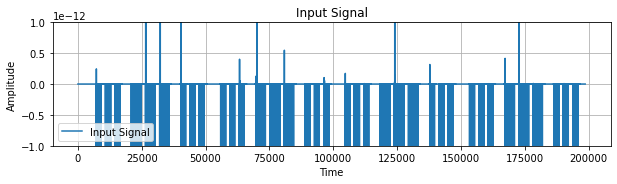

In [8]:
time_axis = np.arange(len(input_signal))

# Plot input signal
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time_axis, input_signal, label='Input Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input Signal')
plt.grid(True)
plt.legend()

/usr/local/share/pynq-venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


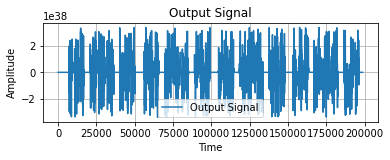

In [11]:
time_axis = np.arange(len(filtered_data))
plt.subplot(2, 1, 2)
plt.plot(time_axis, filtered_data, label='Output Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Output Signal')
plt.grid(True)
plt.legend()

In [10]:
from scipy.io.wavfile import write

In [21]:
filtered_data = np.array(filtered_data)

In [22]:
louder_data = list()
for data in filtered_data:
    if data != float('nan'):
        louder_data.append(data / 10000)
    else:
        louder_data.append(data)

In [23]:
louder_data = np.array(louder_data)

/usr/local/share/pynq-venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


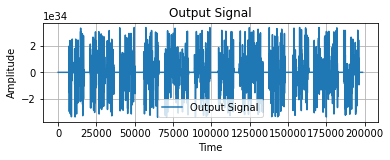

In [24]:
time_axis = np.arange(len(louder_data))
plt.subplot(2, 1, 2)
plt.plot(time_axis, louder_data, label='Output Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Output Signal')
plt.grid(True)
plt.legend()

In [26]:
write('hopefully_filtered_sos_softer.wav', sampling_rate, louder_data)

In [42]:
print(1.234 > float('nan'))

False


In [46]:
counter = 0
with open('sos_input.txt', 'w') as f:
    for data in input_signal:
        if abs(data) > 1e15:
            f.write('1')
        else:
            f.write('0')
        counter += 1
        
        if counter > 48000:
            f.write('\n')
            counter = 0
print('done writing')

done writing


In [ ]:
del filtered_data